In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
import wdp as parser

In [3]:
parser.xml_to_csv('enwiki-p1p857.xml')

Processing...
Done processing


True

In [64]:
df = pd.read_csv('enwiki-p1p857.csv', quotechar='|', sep = '#', engine = 'python', on_bad_lines='warn')
df['timestamp'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%dT%H:%M:%SZ')

In [106]:
df['dates'] = df['timestamp'].dt.date
df['times'] = df['timestamp'].dt.time
df.head()

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revdates
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,7
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,269
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,8
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,161
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,300


In [107]:
df['revbytes'] = df.groupby(by='page_title')['bytes'].transform('sum')
df.head()

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revdates,revbytes
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,7,2848
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,269,2848
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,8,2848
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,161,2848
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,300,2848


In [108]:
df['revperc'] = 100/df['revbytes']*df['bytes']
df

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revdates,revbytes,revperc
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,7,2848,4.353933
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,269,2848,1.228933
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,8,2848,1.193820
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,161,2848,1.264045
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,300,2848,2.001404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548300,857,Aberdeenshire,1063762069,2022-01-04 19:47:38,/* Hydrology and climate */,42968770,ArticleMaker2,34041,*[http://www.aberdeenshire.gov.uk/ Aberdeenshi...,2022-01-04,19:47:38,36,14056754,0.242168
548301,857,Aberdeenshire,1063898137,2022-01-05 13:51:33,comma,10291445,Wiki Gh!,34042,*[https://web.archive.org/web/20060126034453/h...,2022-01-05,13:51:33,72,14056754,0.242175
548302,857,Aberdeenshire,1064618213,2022-01-09 09:19:28,/* Major industries */,42968770,ArticleMaker2,34201,*[https://web.archive.org/web/20060126034453/h...,2022-01-09,09:19:28,24,14056754,0.243307
548303,857,Aberdeenshire,1065536710,2022-01-14 02:29:34,/* History */Fixing bare references [[Wikipedi...,42425010,Rlink2,34255,*[https://web.archive.org/web/20060126034453/h...,2022-01-14,02:29:34,44,14056754,0.243691


In [115]:
df['comment'] = df['comment'].fillna('no comment')
df['comment'].isna().sum()

0

In [145]:
filter = df[df['contributor_name'].isna()]
filter


,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revdates,revbytes,revperc
7,10,AccessibleComputing,381200179,2010-08-26 22:23:51,no comment,76.28.186.133,NaN,1875,""">File talk</namespace> <namespace key=""8"" c...",2010-08-26,22:23:51,148,2848,65.835674
15,12,Anarchism,19746,2002-02-25 15:43:11,*,140.232.153.45,NaN,11279,[[talk:Anarchism/Talk]] <br>[[Anarchism/Todo/T...,2002-02-25,15:43:11,269,1689954733,0.000667
16,12,Anarchism,19749,2002-02-27 17:34:09,*,24.188.31.147,NaN,11394,* David Hart's [http://www.arts.adelaide.edu.a...,2002-02-27,17:34:09,4,1689954733,0.000674
17,12,Anarchism,20514,2002-02-27 17:36:41,*,24.188.31.147,NaN,11486,* David Hart's [http://www.arts.adelaide.edu.a...,2002-02-27,17:36:41,4,1689954733,0.000680
18,12,Anarchism,42733,2002-03-01 00:13:17,term in bold,213.253.39.175,NaN,11488,[[Anarchism/Todo/Todo]] <br>[[talk:Anarchy]] [...,2002-03-01,00:13:17,9,1689954733,0.000680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548270,857,Aberdeenshire,1014766994,2021-03-28 23:47:39,/* Governance and politics */,86.139.205.230,NaN,32920,*[http://www.aberdeenshire.gov.uk/ Aberdeenshi...,2021-03-28,23:47:39,33,14056754,0.234193
548275,857,Aberdeenshire,1016965461,2021-04-10 01:19:05,no comment,2A00:23C7:BB09:201:C873:9543:7F67:27,NaN,33097,*[http://www.aberdeenshire.gov.uk/ Aberdeenshi...,2021-04-10,01:19:05,81,14056754,0.235453
548280,857,Aberdeenshire,1018352476,2021-04-17 16:36:57,interesting development that Aberdeenshire was...,90.62.81.138,NaN,33626,*[http://www.aberdeenshire.gov.uk/ Aberdeenshi...,2021-04-17,16:36:57,56,14056754,0.239216
548281,857,Aberdeenshire,1018356524,2021-04-17 17:05:49,correcting membership of Mearns; the SNP membe...,90.62.81.138,NaN,33627,*[https://web.archive.org/web/20060126034453/h...,2021-04-17,17:05:49,56,14056754,0.239223


In [143]:
df['contributor_id'] = df['contributor_id'].fillna('no id')

In [146]:
df['contributor_name'] = df['contributor_name'].fillna('anon')

In [148]:
df['revtext'] = df['revtext'].fillna('no text')

In [150]:
df.describe()

,page_id,revision_id,bytes,revdates,revbytes,revperc
count,548305.000000,5.483050e+05,5.483050e+05,548305.000000,5.483050e+05,548305.000000
mean,615.323158,3.511284e+08,6.548075e+04,132.985038,6.952073e+08,0.049060
std,223.177424,2.980818e+08,5.329390e+04,88.230235,6.249782e+08,0.941822
min,10.000000,4.430000e+02,0.000000e+00,1.000000,1.880000e+02,0.000000
25%,579.000000,9.593874e+07,2.751700e+04,59.000000,1.933079e+08,0.006537
50%,689.000000,2.697240e+08,5.281700e+04,114.000000,4.468796e+08,0.012158
75%,771.000000,5.521281e+08,8.866000e+04,190.000000,1.058954e+09,0.023240
max,857.000000,1.069247e+09,1.788058e+06,459.000000,2.130167e+09,99.811201


In [ ]:
filter = (~df['revtext'].str.contains('^#'))
x = df[filter]['revtext'].unique()
for i in x: 
    print(i)

In [167]:
df['textedit'] = filter
df.head()

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revdates,revbytes,revperc,textedit
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,7,2848,4.353933,True
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,269,2848,1.228933,False
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,8,2848,1.193820,False
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,161,2848,1.264045,False
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,300,2848,2.001404,False


In [170]:
filtertextedit = df['textedit'] == True
dftextedit = df[filtertextedit]

In [ ]:
filter1 = (dftextedit['revtext'].str.contains('Wiktionary:') & (dftextedit['page_title'] == 'Anarchism'))
x = dftextedit[filter1]['revtext'].unique()
for i in x: 
    print(i)

In [194]:
file1 = open("anarchism.txt","w")
filter1 = (dftextedit['revtext'].str.contains('Wiktionary:') & (dftextedit['page_title'] == 'Anarchism'))
x = dftextedit[filter1]['revtext']
for i in x:
    file1.write(i)
    file1.write('\n')
file1.close()

In [ ]:
file1 = open("anarchism.txt","r")
print(file1.readlines())
#file1.close()

In [252]:
anarchtext = pd.DataFrame(data=x).reset_index()
anarchtext

,index,revtext
0,2514,'''Anarchism''' is derived from the [[Greek l...
1,2516,'''Anarchism''' is derived from the [[Greek l...
2,2518,'''Anarchism''' is derived from the [[Greek l...
3,2525,'''Anarchism''' is derived from the [[Greek l...
4,2527,'''Anarchism''' is derived from the [[Greek l...
5,2536,'''Anarchism''' is derived from the [[Greek l...
6,2538,'''Anarchism''' is derived from the [[Greek l...
7,2581,'''Anarchism''' is derived from the [[Greek l...
8,2582,'''Anarchism''' is derived from the [[Greek l...
9,2583,'''Anarchism''' is derived from the [[Greek l...


In [240]:
import difflib
import re

def tokenize(s):
    return re.split('\s+', s)
def untokenize(ts):
    return ' '.join(ts)
        
def equalize(s1, s2):
    l1 = tokenize(s1)
    l2 = tokenize(s2)
    res1 = []
    res2 = []
    prev = difflib.Match(0,0,0)
    for match in difflib.SequenceMatcher(a=l1, b=l2).get_matching_blocks():
        if (prev.a + prev.size != match.a):
            for i in range(prev.a + prev.size, match.a):
                res2 += ['_' * len(l1[i])]
            res1 += l1[prev.a + prev.size:match.a]
        if (prev.b + prev.size != match.b):
            for i in range(prev.b + prev.size, match.b):
                res1 += ['_' * len(l2[i])]
            res2 += l2[prev.b + prev.size:match.b]
        res1 += l1[match.a:match.a+match.size]
        res2 += l2[match.b:match.b+match.size]
        prev = match
    return untokenize(res1), untokenize(res2)

In [242]:
def insert_newlines(string, every=40, window=10):
    result = []
    from_str = string
    while len(from_str) > 0:
        cut_off = every
        if len(from_str) > every:
            while (from_str[cut_off - 1] != ' ') and (cut_off > (every-window)):
                cut_off -= 1
        else:
            cut_off = len(from_str)
        part = from_str[:cut_off]
        result += [part]
        from_str = from_str[cut_off:]
    return result

In [243]:
def show_comparison(s1, s2, width=40, margin=10, sidebyside=True, compact=False):
    s1, s2 = equalize(s1,s2)

    if sidebyside:
        s1 = insert_newlines(s1, width, margin)
        s2 = insert_newlines(s2, width, margin)
        if compact:
            for i in range(0, len(s1)):
                lft = re.sub(' +', ' ', s1[i].replace('_', '')).ljust(width)
                rgt = re.sub(' +', ' ', s2[i].replace('_', '')).ljust(width) 
                print(lft + ' | ' + rgt + ' | ')        
        else:
            for i in range(0, len(s1)):
                lft = s1[i].ljust(width)
                rgt = s2[i].ljust(width)
                print(lft + ' | ' + rgt + ' | ')
    else:
        print(s1)
        print(s2)

In [255]:
s1 = anarchtext['revtext'][6]
s2 = anarchtext['revtext'][7]
equalize(s1, s2)
show_comparison(s1, s2, width=50, sidebyside=True, compact=False)

'''Anarchism''' is derived from the [[Greek        | '''Anarchism''' is derived from the [[Greek        | 
languageGreek]] ''[[Wiktionary:&#945;&#9           | languageGreek]] ''[[Wiktionary:&#945;&#9           | 
57;&#945;&#961;&#967;&#943;&#945;&#945;&           | 57;&#945;&#961;&#967;&#943;&#945;&#945;&           | 
#957;&#945;&#961;&#967;&#943;&#945;]]'' ("without  | #957;&#945;&#961;&#967;&#943;&#945;]]'' ("without  | 
[[archon]]s (rulers)"). Thus "anarchism," in its   | [[archon]]s (rulers)"). Thus "anarchism," in its   | 
most general meaning, is the philosophy or belief  | most general meaning, is the philosophy or belief  | 
that rulership is unnecessary and should be        | that rulership is unnecessary and should be        | 
abolished. For other usages, see [[anarchism       | __________ ___ _____ _______ ___ ___________       | 
(disambiguation)]].'''Anarchism''' _____           | __________________________________ aboli           | 
____________________ may mean:*[[Anar

 # Abfragen auf Basis pro Artikel

**Wie viele Revisionen wurden vorgenommen?**

Abfrage zählt die Anzahl der einzigartigen Revision-IDs pro Artikel und gibt zusätzlich die durchschnittliche Größe der Revisionen in bytes pro Artikel an. 

In [66]:
revcount = df.groupby(['page_title']).agg({'revision_id' : 'count', 'bytes' : 'mean'})
revcount = revcount.rename({'revision_id' : 'revcount', 'bytes' : 'meansize'}, axis = "columns")
revcount.sort_values(['revcount'], ascending=False)

,revcount,meansize
page_title,,
Anarchism,19961,84662.829167
Abraham Lincoln,17613,108672.676375
Albert Einstein,17476,86462.335031
Albania,16271,94737.645873
American Revolutionary War,15881,134133.046597
...,...,...
Abbreviations,4,7286.500000
AbensbergGermany,4,224.000000
AutoMorphism,4,197.500000


In [67]:
dfrevcount = revcount.reset_index().sort_values(['revcount'], ascending = False)
dfrevcount.head()

,page_title,revcount,meansize
146,Anarchism,19961,84662.829167
27,Abraham Lincoln,17613,108672.676375
96,Albert Einstein,17476,86462.335031
84,Albania,16271,94737.645873
133,American Revolutionary War,15881,134133.046597


Text(0.5, 1.0, 'Top 5 of most revisioned Articles')

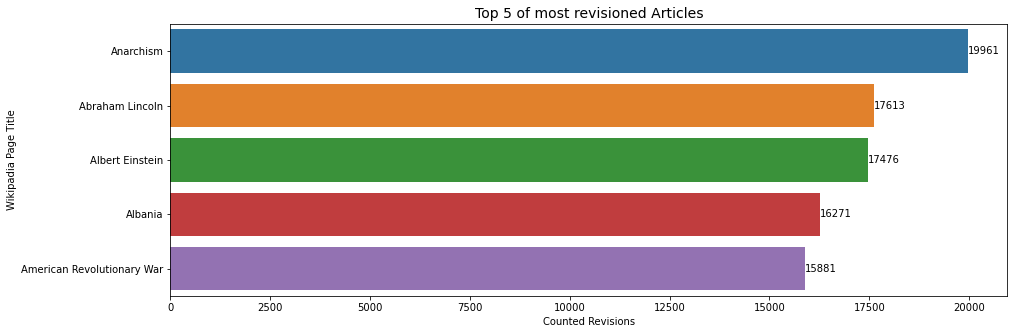

In [68]:
plt.figure(figsize=(15,5))
plot1 = sns.barplot(x = 'revcount', y = 'page_title', data = dfrevcount[:5])
plt.xlabel("Counted Revisions")
plt.ylabel("Wikipadia Page Title")
plt.bar_label(plot1.containers[0])
plt.title("Top 5 of most revisioned Articles", size=14)

**Wie viele Revisionen wurden je Datum vorgenommen?**

Schritt 1: Neue Spalten "dates" und "times" generieren. 

In [69]:
df['dates'] = df['timestamp'].dt.date
df['times'] = df['timestamp'].dt.time
df.head()

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04


Schritt 2: Abfrage gruppiert die Ausgabe nach Titel und Datum und zeigt an, wie viele RevidentInnen an diesem Tag mit durchschnittlich wie vielen Bytes beigetragen haben. 

In [70]:
revdate = df.groupby(['page_title', 'dates']).agg({'revision_id' : 'count', 'bytes' : 'mean'})
revdate = revdate.rename({'revision_id' : 'revcount', 'bytes' : 'meansize'}, axis = "columns")
revdate.sort_values(['page_title', 'dates'], ascending = True)

revcount  meansize
page_title                                     dates                         
A                                              2001-05-17         1    6784.0
                                               2001-06-26         1     871.0
                                               2001-07-05         2    7374.0
                                               2002-02-02         1    7528.0
                                               2002-02-25         1    7565.0
...                                                             ...       ...
Wikipedia:Adding Wikipedia articles to Nupedia 2002-12-20         2    6464.0
                                               2003-01-10         1    6667.0
                                               2003-02-07         1    6596.0
                                               2003-03-12         1    6690.0
                                               2003-03-17         1      45.0

[179720 rows x 2 columns]

In [71]:
dfrevdate = revdate.reset_index().sort_values(['dates'], ascending = True)
dfrevdate.head()

,page_title,dates,revcount,meansize
29626,AfghanistanCommunications,2001-01-21,1,1159.0
29662,AfghanistanTransportations,2001-01-21,1,927.0
29657,AfghanistanTransnationalIssues,2001-01-21,1,523.0
29649,AfghanistanPeople,2001-01-21,1,1601.0
29643,AfghanistanMilitary,2001-01-21,1,718.0


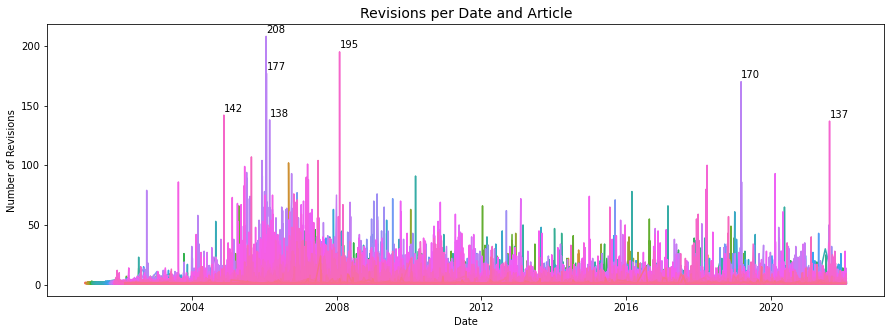

In [73]:
plt.figure(figsize=(15,5))
plot2 = sns.lineplot(x = 'dates', y = 'revcount', data = dfrevdate, hue = 'page_title', legend = None)
plt.xlabel("Date")
plt.ylabel("Number of Revisions")
plt.title("Revisions per Date and Article", size=14)
for x, y in zip(dfrevdate['dates'], dfrevdate['revcount']):
    if y > 130:
        plt.text(x = x, y = y+3, s = '{:.0f}'.format(y))
        filter = (dfrevdate['revcount'] > 130)

**Revisionen pro Datum kumuliert** 

Schritt 1: neue Spalte "revdates" generieren: gibt die Anzahl der Revisionen für diesen Artikel an diesem Tag an.

In [75]:
df['revdates'] = df.groupby(by='dates')['dates'].transform('count')
df

,page_id,page_title,revision_id,timestamp,comment,contributor_id,contributor_name,bytes,revtext,dates,times,revdates
0,10,AccessibleComputing,233192,2001-01-21 02:12:21,*,99,RoseParks,124,This subject covers* AssistiveTechnology* Acce...,2001-01-21,02:12:21,7
1,10,AccessibleComputing,862220,2002-02-25 15:43:11,Automated conversion,1226483,Conversion script,35,#REDIRECT [[Accessible Computing]],2002-02-25,15:43:11,269
2,10,AccessibleComputing,15898945,2003-04-25 22:18:38,Fixing redirect,7543,Ams80,34,#REDIRECT [[Accessible_computing]],2003-04-25,22:18:38,8
3,10,AccessibleComputing,56681914,2006-06-03 16:55:41,fix double redirect,516514,Nzd,36,#REDIRECT [[Computer accessibility]],2006-06-03,16:55:41,161
4,10,AccessibleComputing,74466685,2006-09-08 04:16:04,cat rd,750223,Rory096,57,#REDIRECT [[Computer accessibility]] {{R from ...,2006-09-08,04:16:04,300
...,...,...,...,...,...,...,...,...,...,...,...,...
548300,857,Aberdeenshire,1063762069,2022-01-04 19:47:38,/* Hydrology and climate */,42968770,ArticleMaker2,34041,*[http://www.aberdeenshire.gov.uk/ Aberdeenshi...,2022-01-04,19:47:38,36
548301,857,Aberdeenshire,1063898137,2022-01-05 13:51:33,comma,10291445,Wiki Gh!,34042,*[https://web.archive.org/web/20060126034453/h...,2022-01-05,13:51:33,72
548302,857,Aberdeenshire,1064618213,2022-01-09 09:19:28,/* Major industries */,42968770,ArticleMaker2,34201,*[https://web.archive.org/web/20060126034453/h...,2022-01-09,09:19:28,24
548303,857,Aberdeenshire,1065536710,2022-01-14 02:29:34,/* History */Fixing bare references [[Wikipedi...,42425010,Rlink2,34255,*[https://web.archive.org/web/20060126034453/h...,2022-01-14,02:29:34,44


Schritt 2: Abfrage generiert die kumulierte Summe der täglichen Revisionszahlen auf Basis des Artikels und des Datums

In [76]:
revcums = df.groupby(['page_title', 'dates']).sum().groupby(level=0).cumsum().reset_index()
revcums.head()

,page_title,dates,page_id,revision_id,bytes,revdates
0,A,2001-05-17,290,263232,6784,2
1,A,2001-06-26,580,466368321,7655,3
2,A,2001-07-05,1160,932706906,22403,7
3,A,2002-02-02,1450,932710363,29931,11
4,A,2002-02-25,1740,932795893,37496,280


In [80]:
filter = ((revcums['page_title'].str.contains('anarchism', case = False)))
dfanarchism = revcums[filter]
dfanarchism

,page_title,dates,page_id,revision_id,bytes,revdates
96584,Anarchism,2001-10-11,12,233194,8884,3
96585,Anarchism,2001-11-28,24,466389,17888,4
96586,Anarchism,2001-12-02,48,333118947,36490,20
96587,Anarchism,2002-02-25,72,333156894,57315,558
96588,Anarchism,2002-02-27,96,333197157,80195,566
...,...,...,...,...,...,...
99795,Anarchism,2022-01-22,239400,4739050392828,1688874104,3017886
99796,Anarchism,2022-01-24,239412,4740118102058,1688972365,3017914
99797,Anarchism,2022-01-25,239484,4746524930145,1689561699,3018154
99798,Anarchism,2022-01-26,239496,4747592896184,1689659941,3018186


Text(0.5, 1.0, 'Cum. Revisions per Date for Anarchism')

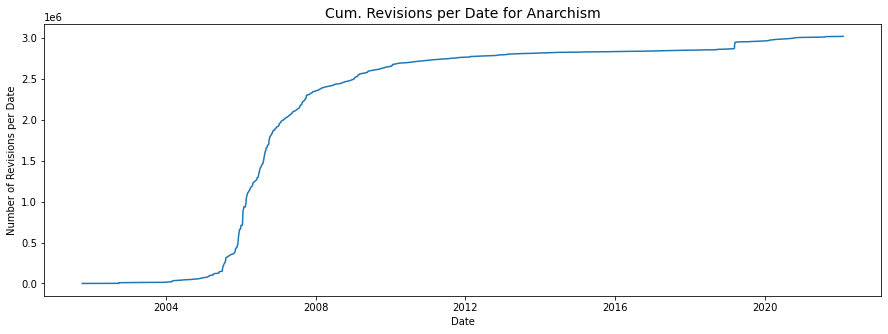

In [85]:
plt.figure(figsize=(15,5))
sns.lineplot(x = 'dates', y = 'revdates', data = dfanarchism, legend = None)
plt.xlabel("Date")
plt.ylabel("Number of Revisions per Date")
plt.title("Cum. Revisions per Date for Anarchism", size=14)

**Wie viele Revisionen wurden von den einzelnen RevidentInnen bearbeitet?**

Abfrage gruppiert nach Artikel, Username und Datum, zählt die Revisionen an diesem Tag und gibt die durchschnittliche Revisionsgröße aus.

In [87]:
revuser = df.groupby(['page_title', 'contributor_name', 'contributor_id', 'dates']).agg({'revdates' : 'count', 'bytes' : 'mean'})
revuser.sort_values(['page_title', 'revdates'], ascending = False)

revdates  \
page_title                                     contributor_name  contributor_id dates                  
Wikipedia:Adding Wikipedia articles to Nupedia Conversion script 1226483        2002-02-25         1   
                                               David Martland    5457           2002-11-18         1   
                                               Eclecticology     372            2002-05-19         1   
                                               Larry_Sanger      0              2001-03-28         1   
                                               MartinHarper      5862           2003-01-10         1   
...                                                                                              ...   
A                                              Žiedas            8859014        2010-01-05         1   
                                               Саша Стефановић   205156         2005-11-22         1   
                                               Учхљёная          30241636       2018-02-19         1   
                                                                                2018-03-13         1   
                                               とある白い猫            184109         2005-11-04         1   

                                                                                              bytes  
page_title                                     contributor_name  contributor_id dates                
Wikipedia:Adding Wikipedia articles to Nupedia Conversion script 1226483        2002-02-25   5059.0  
                                               David Martland    5457           2002-11-18   6457.0  
                                               Eclecticology     372            2002-05-19   5006.0  
                                               Larry_Sanger      0              2001-03-28   4637.0  
                                               MartinHarper      5862           2003-01-10   6667.0  
...                                                                                             ...  
A                                              Žiedas            8859014        2010-01-05   8649.0  
                                               Саша Стефановић   205156         2005-11-22   9942.0  
                                               Учхљёная          30241636       2018-02-19  22639.0  
                                                                                2018-03-13  21315.0  
                                               とある白い猫            184109         2005-11-04   9939.0  

[252436 rows x 2 columns]

In [92]:
dfrevuser = revuser.reset_index().sort_values(['bytes'], ascending = False)
dfrevuser

,page_title,contributor_name,contributor_id,dates,revdates,bytes
73900,Albert Einstein,Jayjg,76027,2005-09-22,1,823404.0
192592,Arabic,Paines,3034273,2006-12-15,1,802181.0
155323,Android (robot),Itshackedforver,25061431,2015-05-04,1,684455.0
190265,Arabic,ClueBot,4928500,2007-10-09,1,591233.0
32428,Acid,Comander Chaos,20495198,2014-01-05,1,481421.0
...,...,...,...,...,...,...
1208,A,Kerzua,4414908,2008-04-06,1,0.0
251509,Talk:Arc de Triomphe,Zundark,70,2002-03-08,1,0.0
222270,Atlantic Ocean,Mister Osama Bin Laden,8208459,2008-10-31,1,0.0
223194,Atlantic Ocean,Zane45177,11994449,2010-05-18,1,0.0


Text(0.5, 1.0, 'Top 5 of biggest Revisions per Contributor')

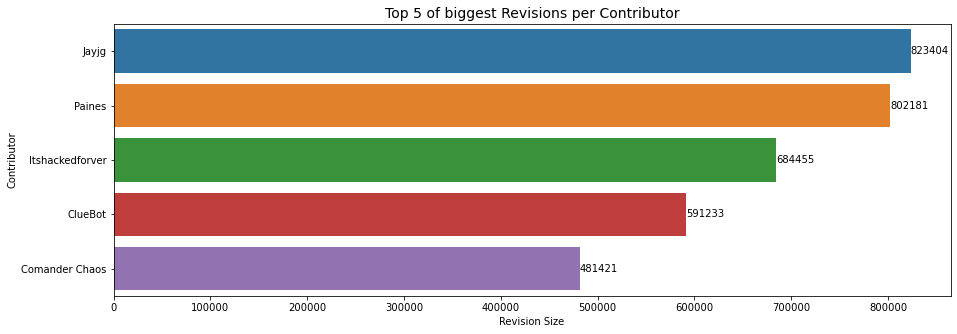

In [105]:
plt.figure(figsize=(15,5))
revuserplot = sns.barplot(x = 'bytes', y = 'contributor_name', data = dfrevuser[:5])
plt.xlabel("Revision Size")
plt.ylabel("Contributor")
plt.bar_label(revuserplot.containers[0])
plt.title("Top 5 of biggest Revisions per Contributor", size=14)